In [539]:
from __future__ import division
import sys, os
import numpy as np
import pandas as pd
from collections import OrderedDict
import pyfits

import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.mlab as mlab
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.patches import Ellipse

In [540]:
from scipy.stats import lognorm

In [541]:
modname      = 'sbpl+blackb'
version      = '-01-'
#version      = 'GBMwLAT_-01-'
#version      = 'GBM_-01-'
detector     = 'GBMwLAT'

burst       = 'bn080916009'

data_dir     = "/Users/derek/Documents/KimiZ/GRBs2/analysis/LAT/%s/integrated/"%burst
mod_dir      = "/Users/derek/Documents/KimiZ/GRBs2/analysis/LAT/%s/PYXSPEC/%s/%s/"%(burst, detector, modname)
desk_dir     = "/Users/derek/Desktop/kim/"
#mod_dir         = "/Users/KimiZ/GRBs2/analysis/LAT/%s/PYXSPEC/%s/%s/"%(burst, detector, modname)
#data_dir        = "/Users/KimiZ/GRBs2/analysis/LAT/%s/integrated/"%burst


fakedatafile    = os.path.join(data_dir, "fakeit_fitresults_%s_%s.fit"%(modname, version))
outfilename = "AfterFakeit_ParamDistPlots_%s_%s.pdf"%(modname, version)
outfile = os.path.join(mod_dir, outfilename)
outfile2 = os.path.join(desk_dir, outfilename)

paramoutfile = os.path.join(mod_dir, "AfterFakeit_ParamErrors_%s_%s.txt"%(modname, version))
paramoutfile2 = os.path.join(mod_dir, "AfterFakeit_ParamErrorsEASYREAD_%s_%s.txt"%(modname, version))

In [542]:
Fdata = pyfits.open(fakedatafile)

In [543]:
iter = 0
Bdata = pd.DataFrame()
for name in Fdata[1].data.columns.names:
    Bdata["%s"%name] = Fdata[1].data["%s"%name]
    if 'PARAM' in name:
        iter += 1
    else:
        pass
nPars = iter

Bdata = Bdata.astype('float64')

In [556]:
data2 = Bdata.sort_values(by="CSTAT", axis=0, ascending=True) 

In [557]:
data2

,PARAM1,PARAM2,PARAM3,PARAM4,PARAM5,PARAM6,NDATA,DOF,CSTAT,LOGLIKE,AIC,BIC
7073,-1.317814,-2.256168,697.576917,0.010767,40.881973,0.000006,380.0,374.0,259.987574,-129.993787,271.987574,295.628601
6719,-1.266385,-2.222541,505.778113,0.011739,39.661101,0.000004,380.0,374.0,274.485447,-137.242724,286.485447,310.126475
4602,-1.292489,-2.216875,527.853341,0.011095,44.021941,0.000004,380.0,374.0,275.321374,-137.660687,287.321374,310.962402
1722,-1.254944,-2.236802,514.891303,0.011714,38.022073,0.000005,380.0,374.0,278.822885,-139.411443,290.822885,314.463913
3846,-1.284223,-2.223840,546.605593,0.011195,42.222900,0.000005,380.0,374.0,286.751013,-143.375507,298.751013,322.392041
7883,-1.283449,-2.246065,599.904443,0.011098,36.031665,0.000007,380.0,374.0,290.709934,-145.354967,302.709934,326.350962
1701,-1.289220,-2.235567,591.418137,0.011003,42.488544,0.000005,380.0,374.0,291.306669,-145.653335,303.306669,326.947697
990,-1.230318,-2.216062,459.631632,0.011613,37.051392,0.000006,380.0,374.0,291.670427,-145.835213,303.670427,327.311454
2263,-1.305508,-2.257894,743.807382,0.010689,40.259192,0.000006,380.0,374.0,292.608778,-146.304389,304.608778,328.249805
2034,-1.263703,-2.243026,564.956804,0.011382,36.597422,0.000007,380.0,374.0,292.828045,-146.414023,304.828045,328.469073


In [547]:
Bdata["CSTAT"].min(), Bdata["CSTAT"].max(), Bdata["CSTAT"].mean()

(259.987573590328, 486.78791482928904, 374.51974692163151)

In [490]:
def Plot_ParamDistributions(modelname, parameter, Xlimits=None, bins=50):
    XLabel = str(parameter)

    x = Bdata["%s"%XLabel]
    mu, sigma = np.mean(x), np.sqrt(np.var(x))
    
    fig = plt.figure(figsize = (11,7))
    ax = fig.add_subplot(111)

    n, bins, patches = ax.hist(x, bins, normed=1, facecolor='green', alpha=0.75)
    bincenters = 0.5*(bins[1:]+bins[:-1])

    # add a 'best fit' line for the normal PDF
    y = mlab.normpdf(bincenters, mu, sigma)


    x1siglo = mu-sigma
    x1sighi = mu+sigma
    x2siglo = mu-2*sigma
    x2sighi = mu+2*sigma
    x3siglo = mu-3*sigma
    x3sighi = mu+3*sigma

    # ax.get_xlim()
    ylow, yhi = ax.get_ylim()
    ylabelpos = yhi - (yhi*.01)
    yhigh = yhi + (yhi*.1)
    #ylow, yhigh = ax.yaxis.get_data_interval()
    ax.vlines(mu, ylow, yhigh, linestyle='--', color="black") # mu + sigma
    ax.vlines(mu+sigma, ylow, yhigh, linestyle='--', color="black") # mu + sigma
    ax.vlines(mu-sigma, ylow, yhigh, linestyle='--', color="black") # mu - sigma
    ax.vlines(mu+2*sigma, ylow, yhigh, linestyle='--', color="black") # mu + 2*sigma
    ax.vlines(mu-2*sigma, ylow, yhigh, linestyle='--', color="black") # mu - 2*sigma
    ax.vlines(mu+3*sigma, ylow, yhigh, linestyle='--', color="black") # mu + 3*sigma
    ax.vlines(mu-3*sigma, ylow, yhigh, linestyle='--', color="black") # mu - 3*sigma
    #ax.text(x,y, "text")
    ax.text(mu, ylabelpos, r"$\mu$", fontsize = 12, horizontalalignment='center')
    ax.text(x1sighi, ylabelpos, r"$1\sigma$", fontsize = 12, horizontalalignment='center')
    ax.text(x1siglo, ylabelpos, r"$1\sigma$", fontsize = 12, horizontalalignment='center')
    ax.text(x2sighi, ylabelpos, r"$2\sigma$", fontsize = 12, horizontalalignment='center')
    ax.text(x2siglo, ylabelpos, r"$2\sigma$", fontsize = 12, horizontalalignment='center')
    ax.text(x3sighi, ylabelpos, r"$3\sigma$", fontsize = 12, horizontalalignment='center')
    ax.text(x3siglo, ylabelpos, r"$3\sigma$", fontsize = 12, horizontalalignment='center')
    ax.set_ylim(ylow, yhigh)
    
    ax.set_xlim(mu-5*sigma, mu+5*sigma)
    
    # if Xlimits is not None:
    #     ax.set_xlim(Xlimits)
    
    ax.plot(bincenters, y, 'r--', linewidth=1)
    ax.set_xlabel('%s'%XLabel)
    ax.set_title('%s'%modelname)


## Here I define the PDF of the lognormal distribution and use it to plot the best fit to the data.

mu: 6.268002  sigma: 0.189419


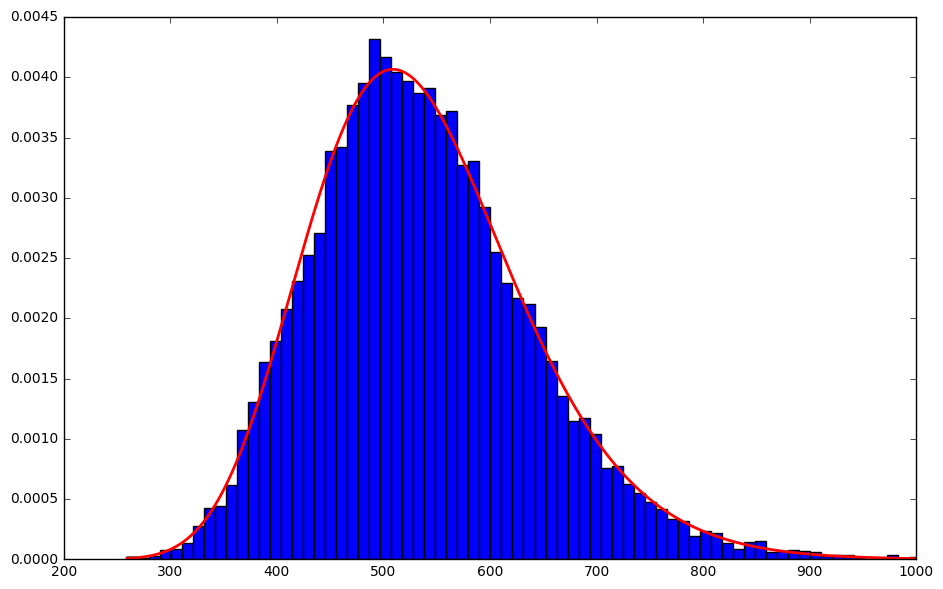

In [493]:
def lognormpdf(x, mu, sigma):
    return (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2)) / (x * sigma * np.sqrt(2 * np.pi)))


plt.figure(figsize=(11,7))
b = Bdata["PARAM3"]
count, bins, ignored = plt.hist(b, 100, normed=True, align='mid')

sigma = np.std(np.log(b))
mu = np.mean(np.log(b))

print "mu: %f  sigma: %f"%(mu, sigma)

x = np.linspace(min(bins), max(bins), 10000)

plt.plot(x, lognormpdf(x, mu, sigma), color='r', linewidth=2)

plt.xlim(200,1000)
plt.show()

## scipy.stat's lognorm.pdf is different from the one I made above.  It's missing a factor.
\begin{equation}
\text{Notation}: \ \  \ln \mathcal{N}(\mu, \sigma^2)
\end{equation}

lognorm.pdf(x, s) 
\begin{equation}
= \frac{1}{x \ s \ \sqrt{2 \pi}} \exp \left( -\frac{1}{2} \left( \frac{\ln(x)}{s} \right)^2\right)
\end{equation}


\begin{equation}
= \frac{1}{x \ \sigma \ \sqrt{2 \pi}} \exp \left( -\frac{ (\ln(x) - \mu)^2}{2 \sigma^2} \right)
\end{equation}


You should notice that the first one, the stats.lognorm.pdf(x,s) versions:
- there is no $\mu$.

In [432]:
data = Bdata["PARAM3"]

sigma  = np.std(np.log(data));    # sigma is shape
mu     = np.mean(np.log(data));   # mu is loc
scale  = np.exp(mu);              # scale
print "sigma: %f   mu: %f   scale: %f"%(sigma, mu, scale)

sigma: 0.189419   mu: 6.268002   scale: 527.422793


In [433]:
# lognorm.fit()  returns: shape(sigma), loc(mu), scale
sigma, mu, scale = lognorm.fit(data)
print "sigma: %f   mu: %f   scale: %f"%(sigma, mu, scale)

sigma: 0.200801   mu: 29.384096   scale: 497.475270


## Comparing the plots of the lognorm.fit(data) to using std, mean, and exp(mean) 
## to determine shape, loc, and scale.

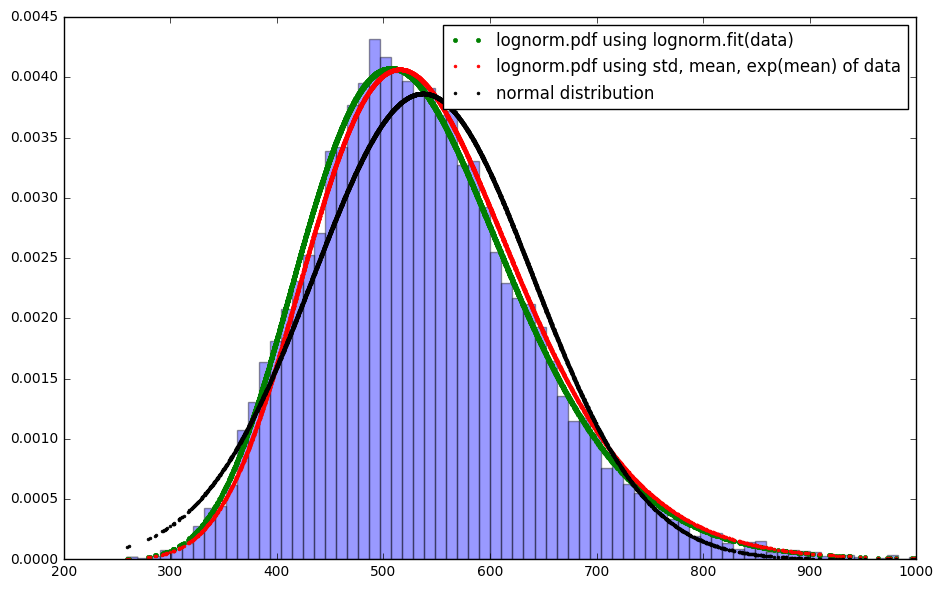

In [524]:
data = Bdata["PARAM3"]
plt.figure(figsize=(11,7))
count, bins, ignored = plt.hist(b, 100, normed=True, align='mid', alpha=0.4)

sigma, mu, scale = lognorm.fit(data)
x      = data
y      = lognorm.pdf(x, sigma, mu, scale)
plt.plot(x, y, 'g.', ms=6, label='lognorm.pdf using lognorm.fit(data)')


sigma   = np.std(np.log(data))
mu      = np.mean(np.log(data))
scale   = np.exp(mu)
x      = data
y      = lognorm.pdf(x, sigma, mu, scale)
plt.plot(x, y, 'r.', ms=4, label='lognorm.pdf using std, mean, exp(mean) of data')


from scipy.stats import norm
x      = data
mu     = data.mean()
scale  = data.std()
y      = norm.pdf(x, loc=mu, scale=scale)
plt.plot(x, y, 'k.', ms=4, label='normal distribution')


plt.xlim(200,1000)
plt.legend(loc='best')
plt.show()

In [504]:
sigma_fit, mu_fit, scale_fit = lognorm.fit(Bdata["PARAM3"])

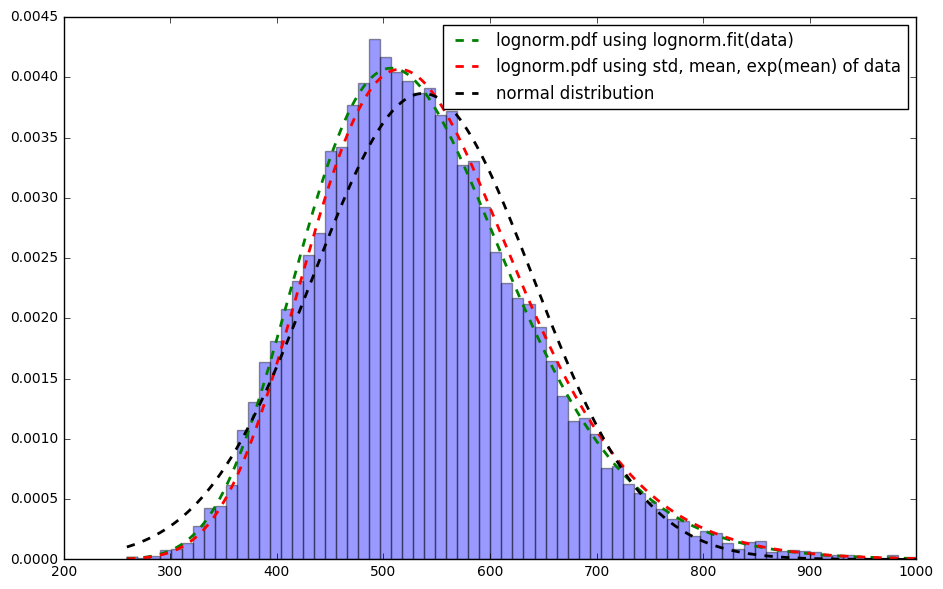

In [538]:
data = Bdata["PARAM3"]
plt.figure(figsize=(11,7))
count, bins, ignored = plt.hist(b, 100, normed=True, align='mid', alpha=0.4)

x      = np.linspace(data.min(), data.max(), 10000)
y      = lognorm.pdf(x, sigma_fit, mu_fit, scale_fit)
plt.plot(x, y, 'g--', lw=2, label='lognorm.pdf using lognorm.fit(data)')


sigma   = np.std(np.log(data))
mu      = np.mean(np.log(data))
scale   = np.exp(mu)
x      = np.linspace(data.min(), data.max(), 10000)
y      = lognorm.pdf(x, sigma, mu, scale)
plt.plot(x, y, 'r--', lw=2, label='lognorm.pdf using std, mean, exp(mean) of data')

from scipy.stats import norm
x      = np.linspace(data.min(), data.max(), 10000)
mu     = data.mean()
scale  = data.std()
y      = norm.pdf(x, loc=mu, scale=scale)
plt.plot(x, y, 'k--', lw=2, label='normal distribution')

plt.xlim(200,1000)
plt.legend(loc='best')
plt.show()

mu: 6.268002  sigma: 0.189419  scale: 527.422793
P(0.025)= 370.120609   P(.5)= 533.690796    P(.975)= 770.794072


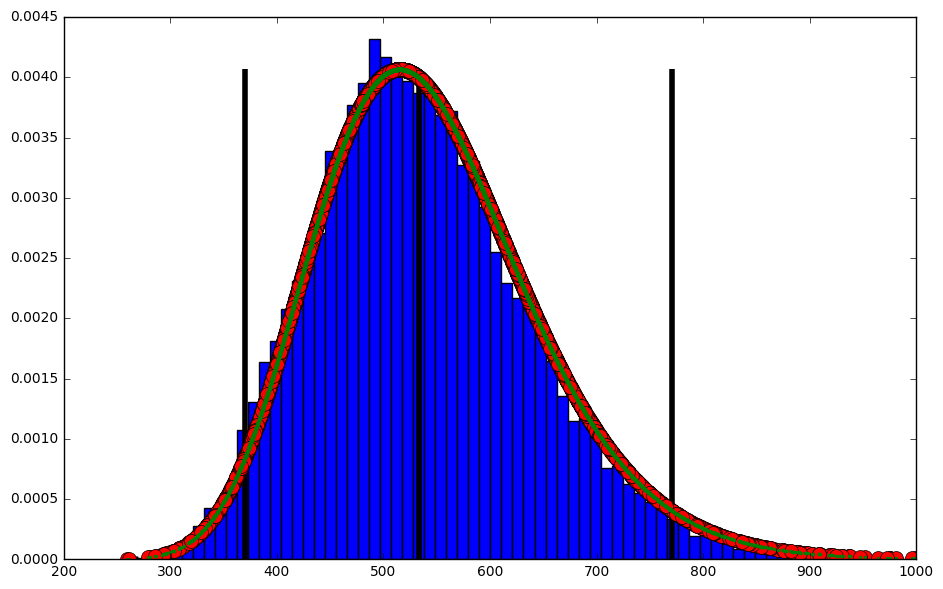

In [419]:
data = Bdata["PARAM3"]
plt.figure(figsize=(11,7))
count, bins, ignored = plt.hist(b, 100, normed=True, align='mid')

sigma   = np.std(np.log(data))
mu      = np.mean(np.log(data))
scale   = np.exp(mu);  
print "mu: %f  sigma: %f  scale: %f"%(mu, sigma, scale)

x      = data
y_eqn  = (x - mu)/scale
y      = lognorm.pdf(y_eqn, sigma)/scale
plt.plot(x, y, 'ro', ms=10)

x      = data
y_eqn  = (x - mu)
y      = lognorm.pdf(x, sigma, mu, scale)

plt.plot(x, y, 'g.', ms=4)

vals = lognorm.ppf([0.025, 0.5, 0.975], s=sigma, loc=mu, scale=scale)
print "P(0.025)= %f   P(.5)= %f    P(.975)= %f"%(vals[0], vals[1], vals[2])

plt.vlines(vals, y.min(), y.max(), colors='black', lw=4)
plt.xlim(200,1000)
plt.show()

In [444]:
sigma, mu, scale

(0.18941859947654069, 6.2680024912611554, 527.42279331868428)

In [466]:
# no mode in numpy
np.mean(data), np.median(data), np.var(data)

(536.99933128312739, 527.23200574616567, 10652.347973994305)

In [461]:
data.mean(), data.median(), data.mode(), data.var()

(536.99933128312739,
 527.2320057461657,
 Series([], dtype: float64),
 10653.413315325837)

In [460]:
# mean, median, mode, variance
np.exp(mu+(sigma**2)/2.), np.exp(mu), np.exp(mu-(sigma**2)), (np.exp(sigma**2)-1)*np.exp(2*mu+sigma**2)

(536.96998235971103,
 527.42279331868428,
 508.83463692869492,
 10533.183936849424)

In [484]:
lognorm.mean(sigma, mu, scale), lognorm.median(sigma, mu, scale), lognorm.var(sigma, mu, scale)

(543.23798485097234, 533.69079580994548, 10533.183936849427)

In [489]:
lognorm.mean(sigma, mu, scale), lognorm.median(sigma, mu, scale), lognorm.var(sigma, mu, scale)

(543.23798485097234, 533.69079580994548, 10533.183936849427)

In [ ]:
# mean
plt.vlines(524.111, 0, 0.005, colors='blue')

# 1 sigma
plt.vlines(443.6638, 0, 0.005, colors='blue')
plt.vlines(620.48059, 0, 0.005, colors='blue')

# 2 sigma
plt.vlines(375.74341, 0, 0.005, colors='blue')
plt.vlines(735.930723, 0, 0.005, colors='blue')

In [435]:
vals = lognorm.ppf([0.025, 0.5, 0.975], s=sigma, loc=mu, scale=scale)
vals

array([ 370.12060894,  533.69079581,  770.79407152])

In [439]:
lognorm.ppf([0.34, 0.5, 0.65], s=sigma, loc=mu, scale=scale)

array([ 494.05279174,  533.69079581,  573.62535376])

mu: 6.268002  sigma: 0.189419


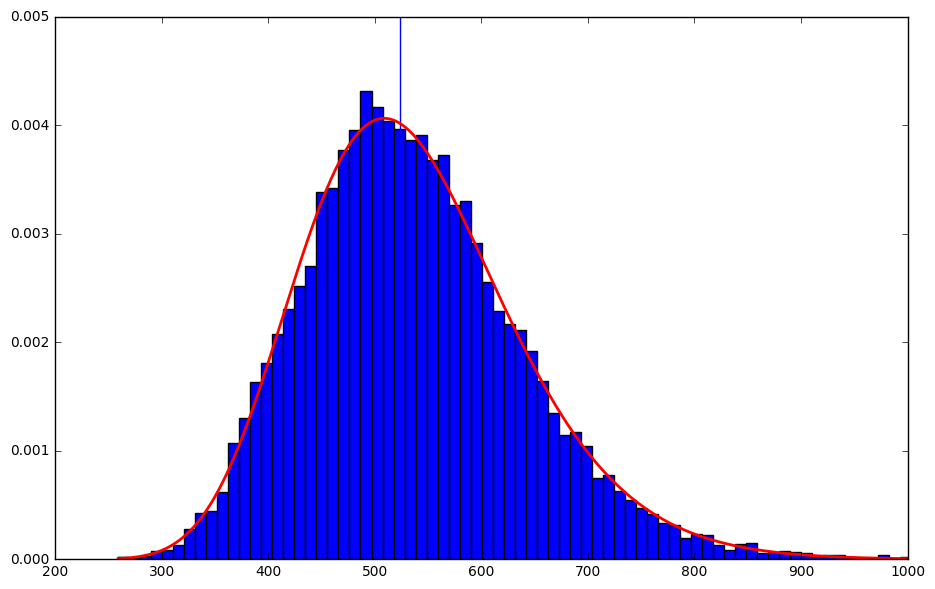

In [436]:
# Generate a thousand samples: each is the product of 100 random
# values, drawn from a normal distribution.
# b = []
# for i in range(1000):
#     a = 10. + np.random.random(100)
#     b.append(np.product(a))

#b = np.array(b) / np.min(b) # scale values to be positive
plt.figure(figsize=(11,7))
b = Bdata["PARAM3"]
count, bins, ignored = plt.hist(b, 100, normed=True, align='mid')
sigma = np.std(np.log(b))
mu = np.mean(np.log(b))
print "mu: %f  sigma: %f"%(mu, sigma)

x = np.linspace(min(bins), max(bins), 10000)
pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2)) / (x * sigma * np.sqrt(2 * np.pi)))

plt.plot(x, pdf, color='r', linewidth=2)

plt.vlines(524.111, 0, 0.005, colors='blue')
plt.xlim(200,1000)
plt.show()

In [318]:
lognorm.ppf([0.025], pdf)

array([ 0.99998598,  0.99998587,  0.99998577, ...,  0.99999996,
        0.99999996,  0.99999996])

In [325]:
vals = lognorm.ppf([0.001, 0.5, 0.999], b.mean())

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:3188: RuntimeWarning: overflow encountered in exp
  return exp(s * _norm_ppf(q))


In [326]:
vals

array([  0.,   1.,  inf])

(200, 1000)

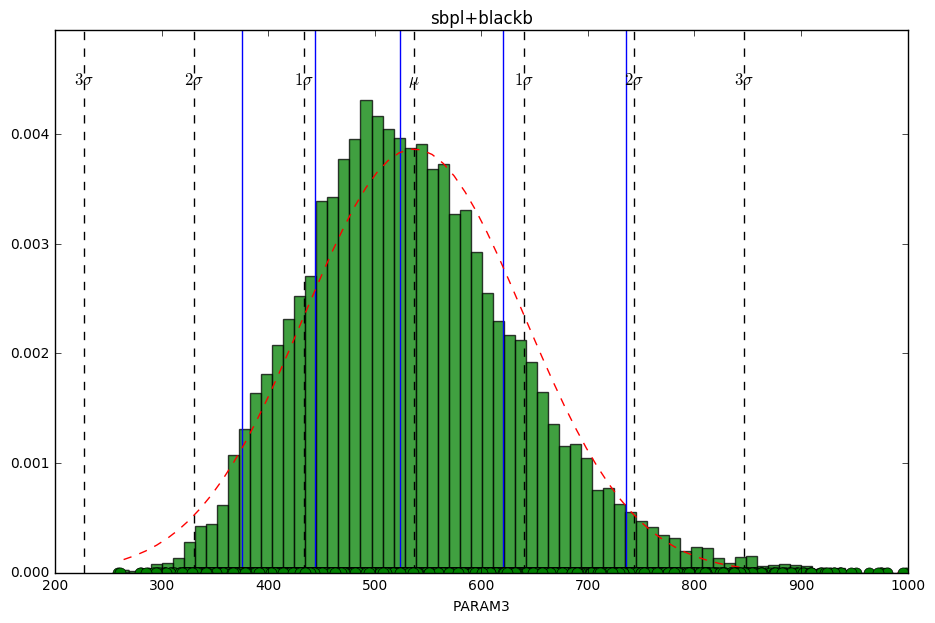

In [156]:
xA = Bdata["PARAM3"]
muA = Bdata["PARAM3"].mean()
Plot_ParamDistributions(modname, 'PARAM3', bins=100)
plt.plot(xA, poisson.pmf(xA, muA), 'go', ms=8, label='poisson pmf')
plt.vlines(524.111, 0, 0.005, colors='blue')
plt.vlines(443.6638, 0, 0.005, colors='blue')
plt.vlines(620.48059, 0, 0.005, colors='blue')
plt.vlines(375.74341, 0, 0.005, colors='blue')
plt.vlines(735.930723, 0, 0.005, colors='blue')
plt.xlim(200,1000)

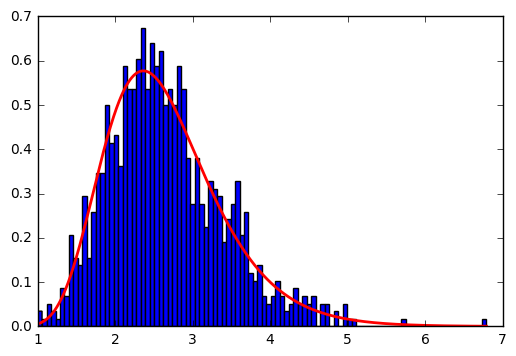

In [147]:
# Generate a thousand samples: each is the product of 100 random
# values, drawn from a normal distribution.
b = []
for i in range(1000):
    a = 10. + np.random.random(100)
    b.append(np.product(a))

b = np.array(b) / np.min(b) # scale values to be positive
count, bins, ignored = plt.hist(b, 100, normed=True, align='mid')
sigma = np.std(np.log(b))
mu = np.mean(np.log(b))

x = np.linspace(min(bins), max(bins), 10000)
pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2)) / (x * sigma * np.sqrt(2 * np.pi)))

plt.plot(x, pdf, color='r', linewidth=2)
plt.show()

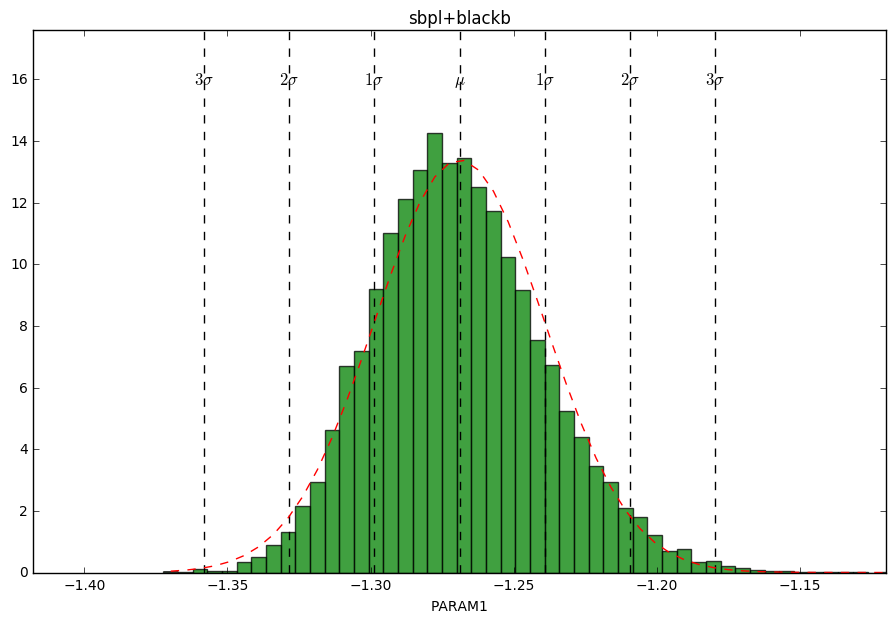

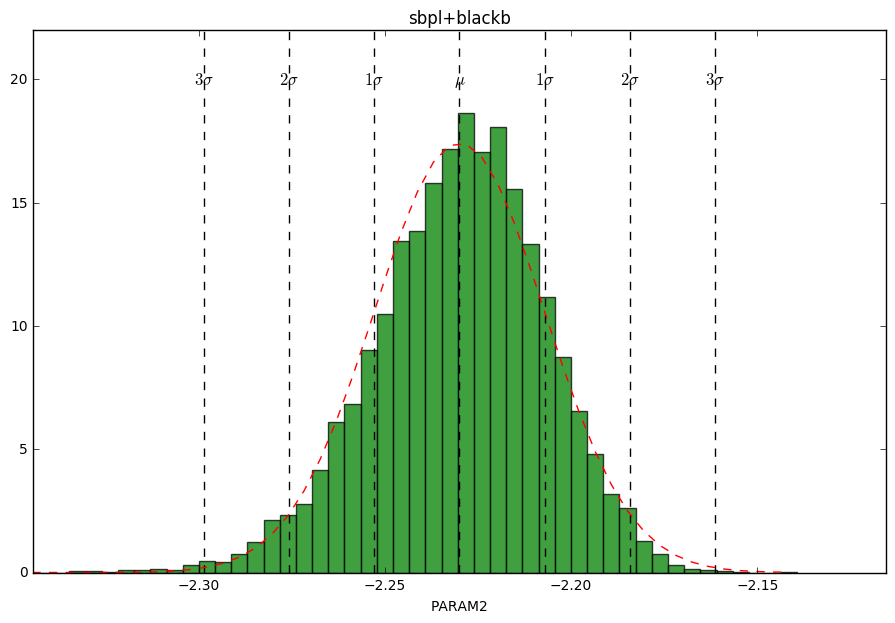

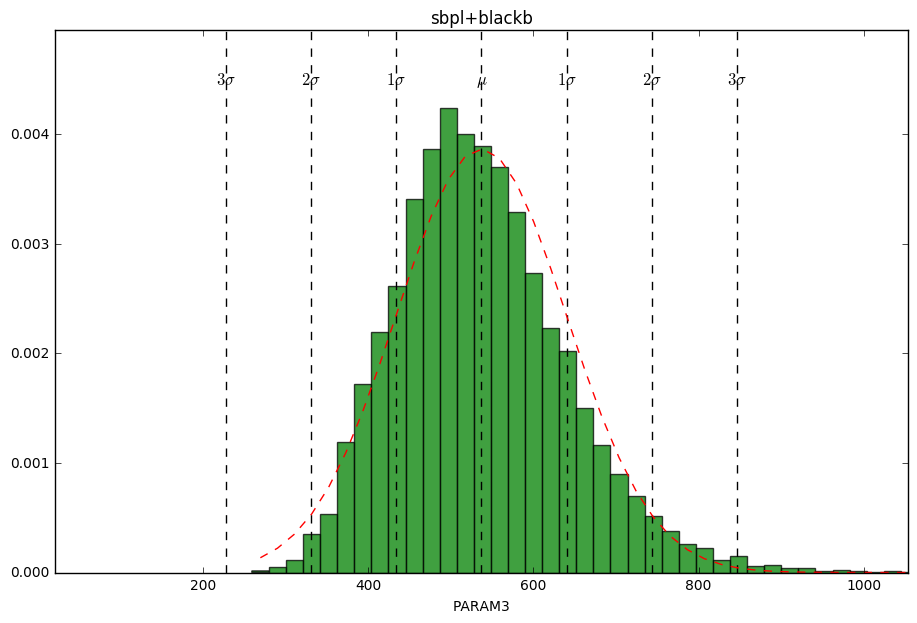

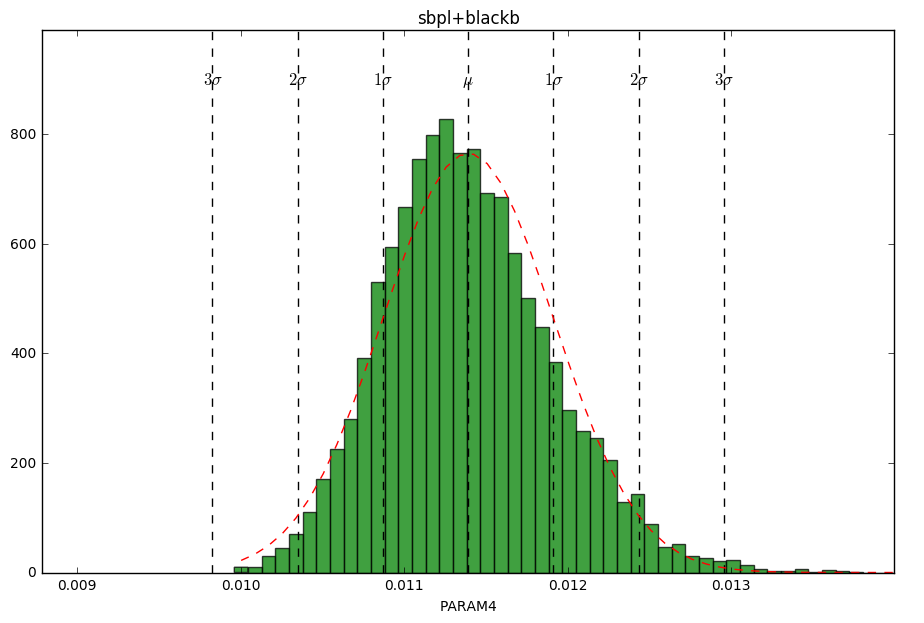

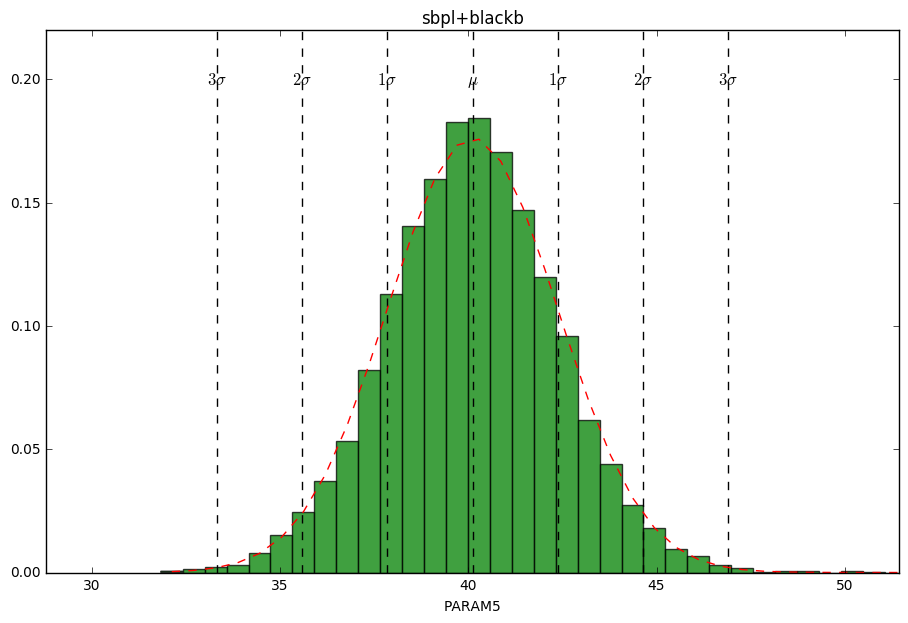

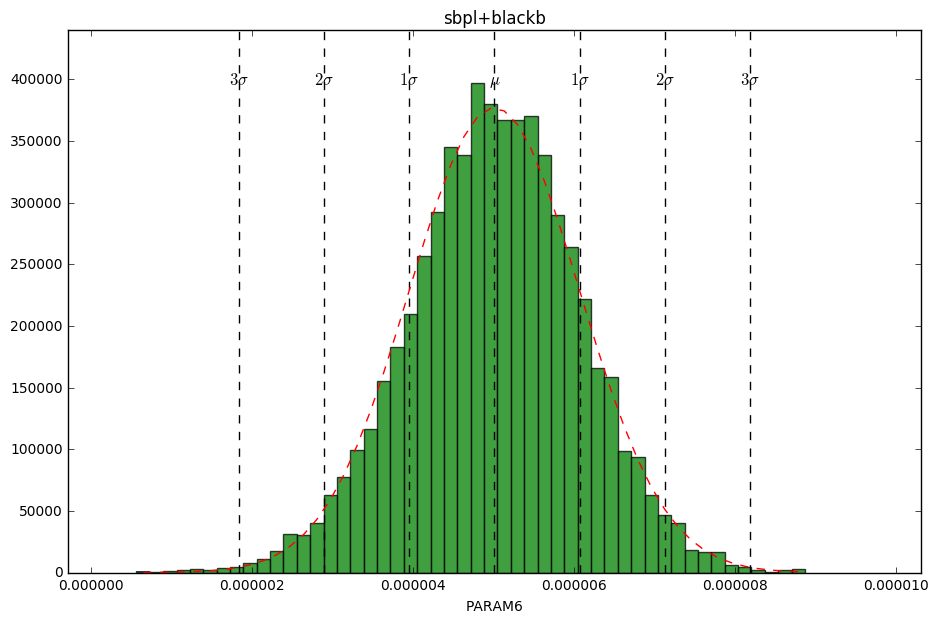

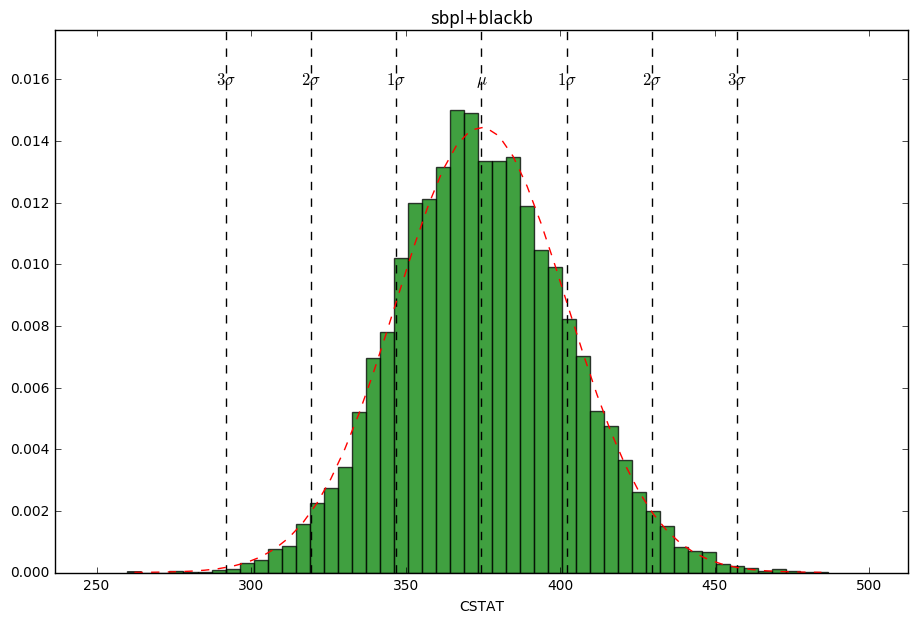

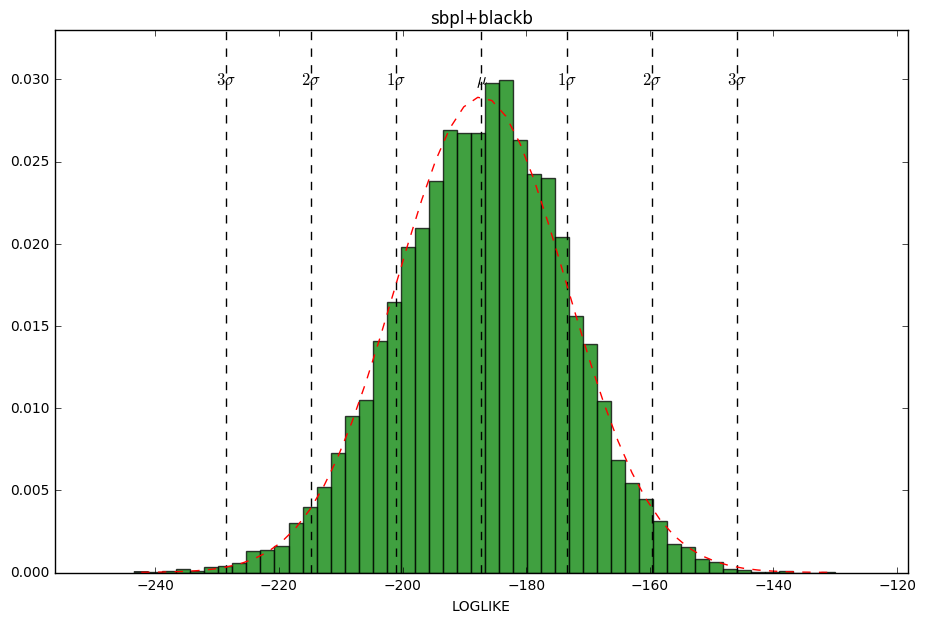

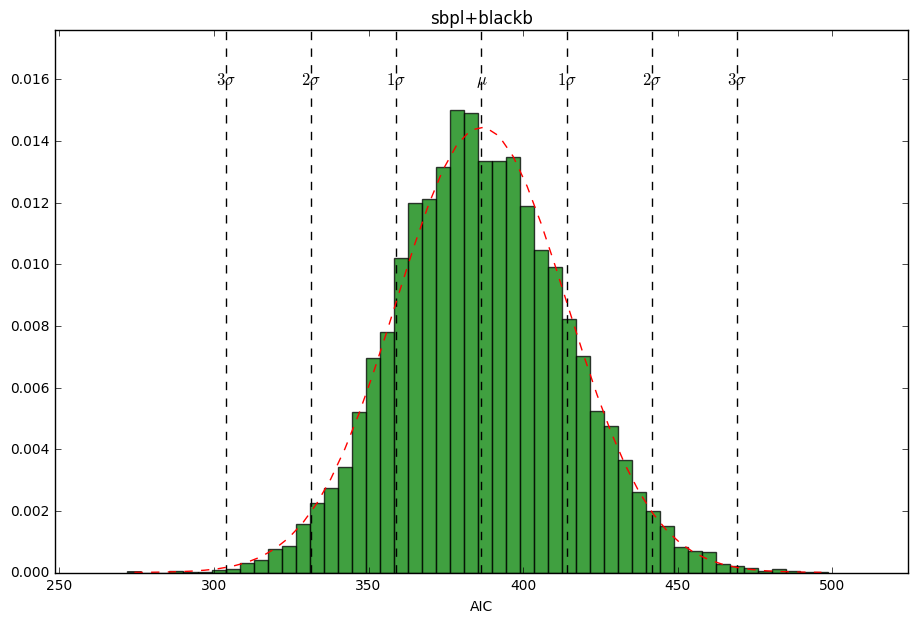

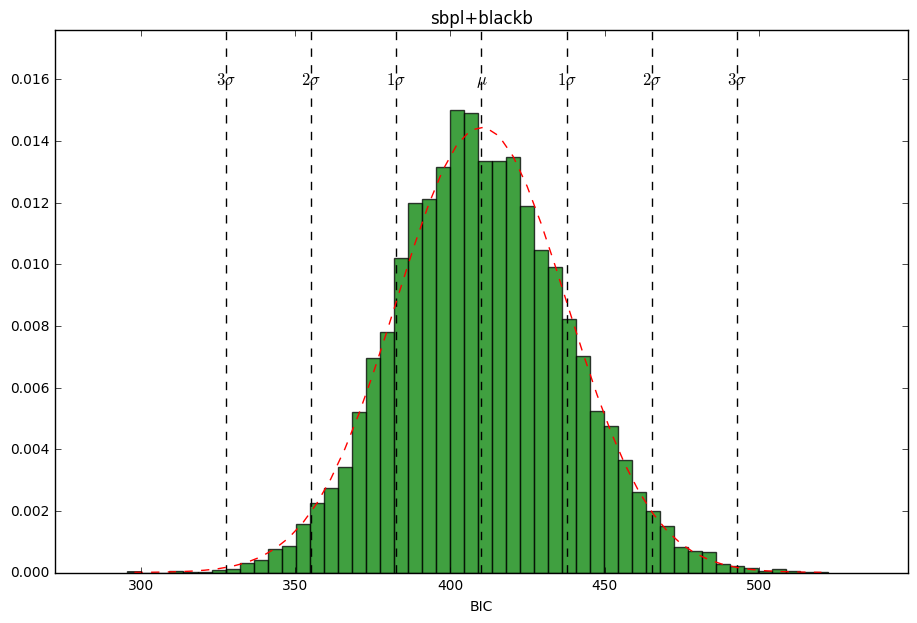

In [9]:
for name in Bdata.columns:
    if 'PARAM' in name:
        Plot_ParamDistributions(modname, name)
        #plt.savefig(pp, format='pdf', dpi=150, bbox_inches = 'tight')
    elif ('AIC' in name) or ('BIC' in name) or ('LOGLIKE' in name) or ('CSTAT' in name):
        Plot_ParamDistributions(modname, name)
        #plt.savefig(pp, format='pdf', dpi=150, bbox_inches = 'tight')
    else:
        pass